In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

(100, 1)
(100, 1)


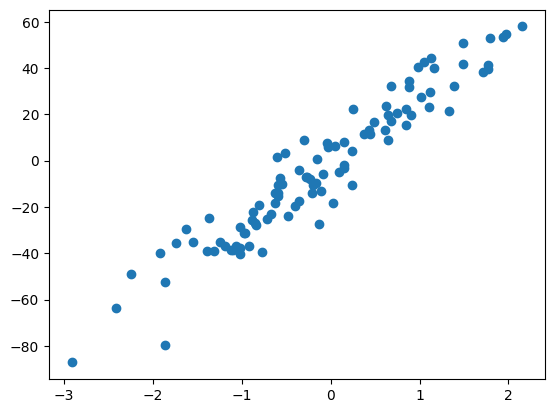

In [2]:
X, Y = make_regression(100, n_features = 1, n_targets = 1, noise = 10, random_state = 3)
Y = Y.reshape((100, 1))
print(X.shape)
print(Y.shape)
plt.scatter(X, Y)

In [3]:
import Layer

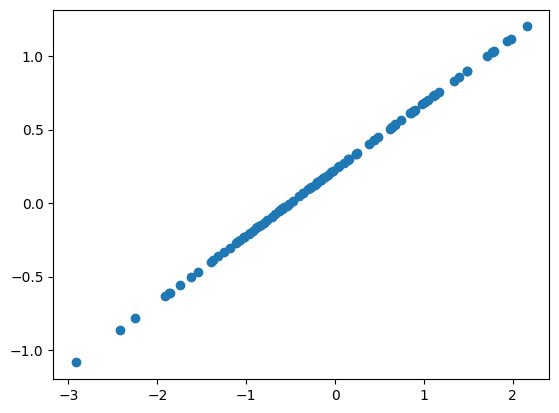

In [4]:
l1 = Layer.Linear(1, 1)
out = l1(X)
plt.scatter(X, out)

### 測試多層Linear的效果

In [5]:
l1 = Layer.Linear(1, 5)
relu1 = Layer.Relu()
l2 = Layer.Linear(5, 1)

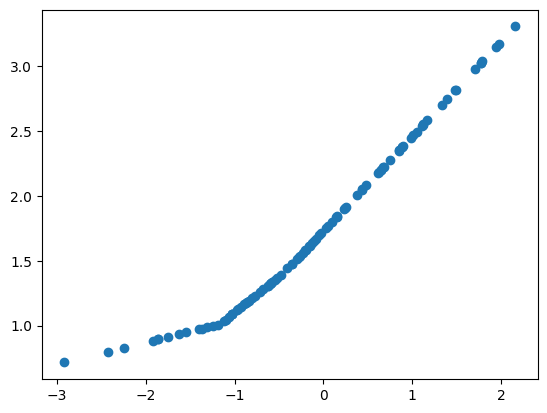

In [6]:
out = l1(X)
out = relu1(out)
out = l2(out)

plt.scatter(X, out)

In [7]:
learningRate = 0.01

### 實作反向傳播

In [11]:
def backward(dz: np.ndarray, layer, layerIn: np.ndarray) -> np.ndarray:
    # w的梯度
    gw = layerIn.T.dot(dz)
    # b的梯度
    gb = np.sum(dz, axis = 0, keepdims = True)
    new_dz = dz.dot(layer.weight.T)
    # print(gw)
    # print(gb)
    layer.weight -= learningRate * gw
    layer.bias -= learningRate * gb
    return new_dz

### 訓練

793.7492953422042
[[-24.74370079]
 [-53.16185233]
 [-35.74159803]
 [-35.16927186]
 [-37.70429166]
 [-16.02394663]
 [-20.17853706]
 [-53.82896712]
 [-21.76905987]
 [ -1.13977299]]
[[ -7.18628055 -44.61101446 -50.08387614 -15.12532376 -10.12403695
  -33.81827836 -20.12094432 -33.93831649 -34.02552836 -30.97048437]]
551.7276317092873
[[-23.29025179]
 [-64.03454859]
 [-52.92634558]
 [-35.66469071]
 [-34.23212712]
 [-28.20907691]
 [-25.00407015]
 [-59.46576527]
 [-32.75692154]
 [-15.08674715]]
[[-17.17821401 -60.50190077 -56.92668126 -28.38839775 -25.50766123
  -34.71354168 -25.54314773 -52.17597579 -37.5201291  -25.57328063]]
238.51722230289704
[[-17.89980678]
 [-53.16080724]
 [-46.29828661]
 [-28.2918967 ]
 [-25.28548267]
 [-24.7090307 ]
 [-20.26626984]
 [-48.1968826 ]
 [-27.83846386]
 [-15.01392581]]
[[-15.88306352 -51.23101555 -46.28676048 -25.50887577 -23.49259655
  -27.16148054 -21.09767429 -45.29143725 -29.95083461 -18.51930893]]
87.03628645616247
[[ -3.48250572]
 [-10.90382348]
 [-1

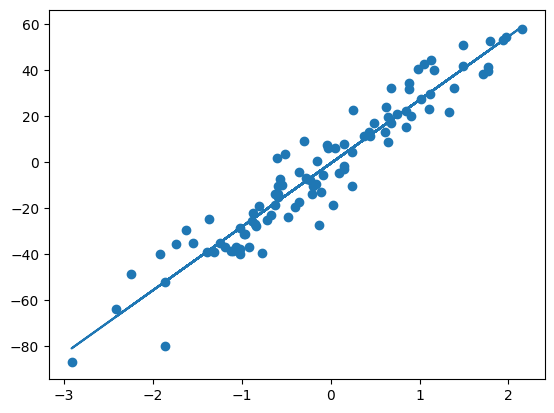

In [12]:
l1 = Layer.Linear(1, 10)
l2 = Layer.Linear(10, 1)

for i in range(50):
    # forward pass
    out1 = l1(X)
    out2 = l2(out1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
prediction = l2(out1)
plt.plot(X, prediction)
plt.scatter(X, Y)
plt.show()

### 加入Relu後

908.6275131736359
[[-15.17441822]
 [ -8.20175249]
 [-23.13778552]
 [  5.18871565]
 [-37.56724727]
 [ -9.73715578]
 [-20.30999773]
 [-21.02806433]
 [-16.45312173]
 [-48.12704527]]
[[-13.19986574 -45.89468811 -18.15111469 -60.90897933 -15.19136044
  -10.91726744  -4.43292294 -16.24389499  -1.32953296  -1.72870455]]
815.4662612349838
[[-20.25359317]
 [-33.55834705]
 [-30.03203907]
 [-29.73558453]
 [-41.07987947]
 [-14.10158166]
 [-18.89552357]
 [-26.87057596]
 [-13.94060454]
 [-45.00477824]]
[[-14.16809592 -21.30492798 -19.05268122 -22.7523217  -20.95466745
  -11.41166909 -11.61344529 -18.38437007  -7.59129097 -11.19269347]]
732.0493949128648
[[-23.19894888]
 [-37.58436067]
 [-33.33704793]
 [-34.67511073]
 [-43.09349293]
 [-16.44394652]
 [-18.72467949]
 [-30.60023343]
 [-12.84016381]
 [-44.20911576]]
[[-13.93591619 -21.45429865 -19.27111975 -21.79695903 -23.26338694
  -10.3942605  -14.42323574 -18.52646725 -10.32264218 -15.52687873]]


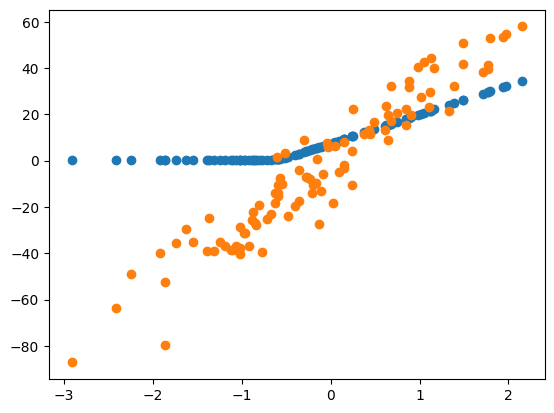

In [13]:
l1 = Layer.Linear(1, 10)
relu1 = Layer.Relu()
l2 = Layer.Linear(10, 1)

for i in range(3):
    # forward pass
    out1 = l1(X)
    a1 = relu1(out1)
    out2 = l2(a1)
    
    # 計算誤差，用MSE
    loss = np.mean(np.square(out2 - Y))
    print(loss)
    
    # backward pass
    dz2 = 2 * (out2 - Y) / out2.shape[0] # MES的導數
    dz1 = backward(dz2, l2, out1)
    dz1 *= relu1.derivative(out1)
    _ = backward(dz1, l1, X)
    
# 跑跑看效果
out1 = l1(X)
a1 = relu1(out1)
prediction = l2(a1)
plt.scatter(X, prediction)
plt.scatter(X, Y)
plt.show()